In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

In [3]:
# Cargar el archivo de test .npz
test_data = np.load('test_data.npz')
X_test = test_data['X_test']
y_test = test_data['y_test']

In [4]:
model = load_model('model.h5', custom_objects={'F1Score': F1Score})
# Este warning sale por versiones de tensorflow, ya que el entrenamiento se ha hecho en otra versión, se puede ignorar.

In [5]:
THRESHOLD = 0.55  # Umbral para convertir probabilidades en etiquetas binarias

# Hacer predicciones
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > THRESHOLD).astype(int)  # Convertir probabilidades a etiquetas binarias

9/9 [==============================] - 1s 54ms/step


In [6]:
# Calcular el F1-Score
f1 = f1_score(y_test, y_pred_binary, average='weighted')
print(f'F1 Score: {f1}')

F1 Score: 0.8365979495231353


In [7]:
# Reporte de clasificación detallado
print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred_binary))


Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       173
           1       0.94      0.87      0.90       137
           2       0.82      0.72      0.77       151

   micro avg       0.88      0.80      0.84       461
   macro avg       0.88      0.80      0.84       461
weighted avg       0.88      0.80      0.84       461
 samples avg       0.51      0.52      0.50       461



c:\Users\gonibix23\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gonibix23\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


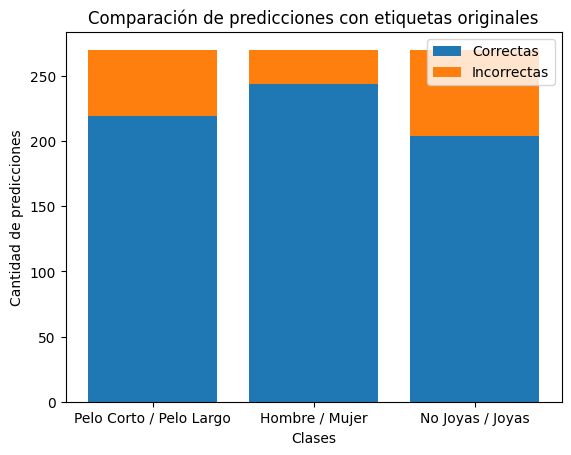

In [8]:
import numpy as np

import matplotlib.pyplot as plt

# Contar las predicciones correctas e incorrectas
correct_predictions = np.sum(y_pred_binary == y_test, axis=0)
incorrect_predictions = np.sum(y_pred_binary != y_test, axis=0)

# Crear el gráfico de barras apiladas
labels = ['Pelo Corto / Pelo Largo', 'Hombre / Mujer', 'No Joyas / Joyas']
x = np.arange(len(labels))

fig, ax = plt.subplots()
bar1 = ax.bar(x, correct_predictions, label='Correctas')
bar2 = ax.bar(x, incorrect_predictions, bottom=correct_predictions, label='Incorrectas')

# Añadir etiquetas y título
ax.set_xlabel('Clases')
ax.set_ylabel('Cantidad de predicciones')
ax.set_title('Comparación de predicciones con etiquetas originales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Mostrar el gráfico
plt.show()

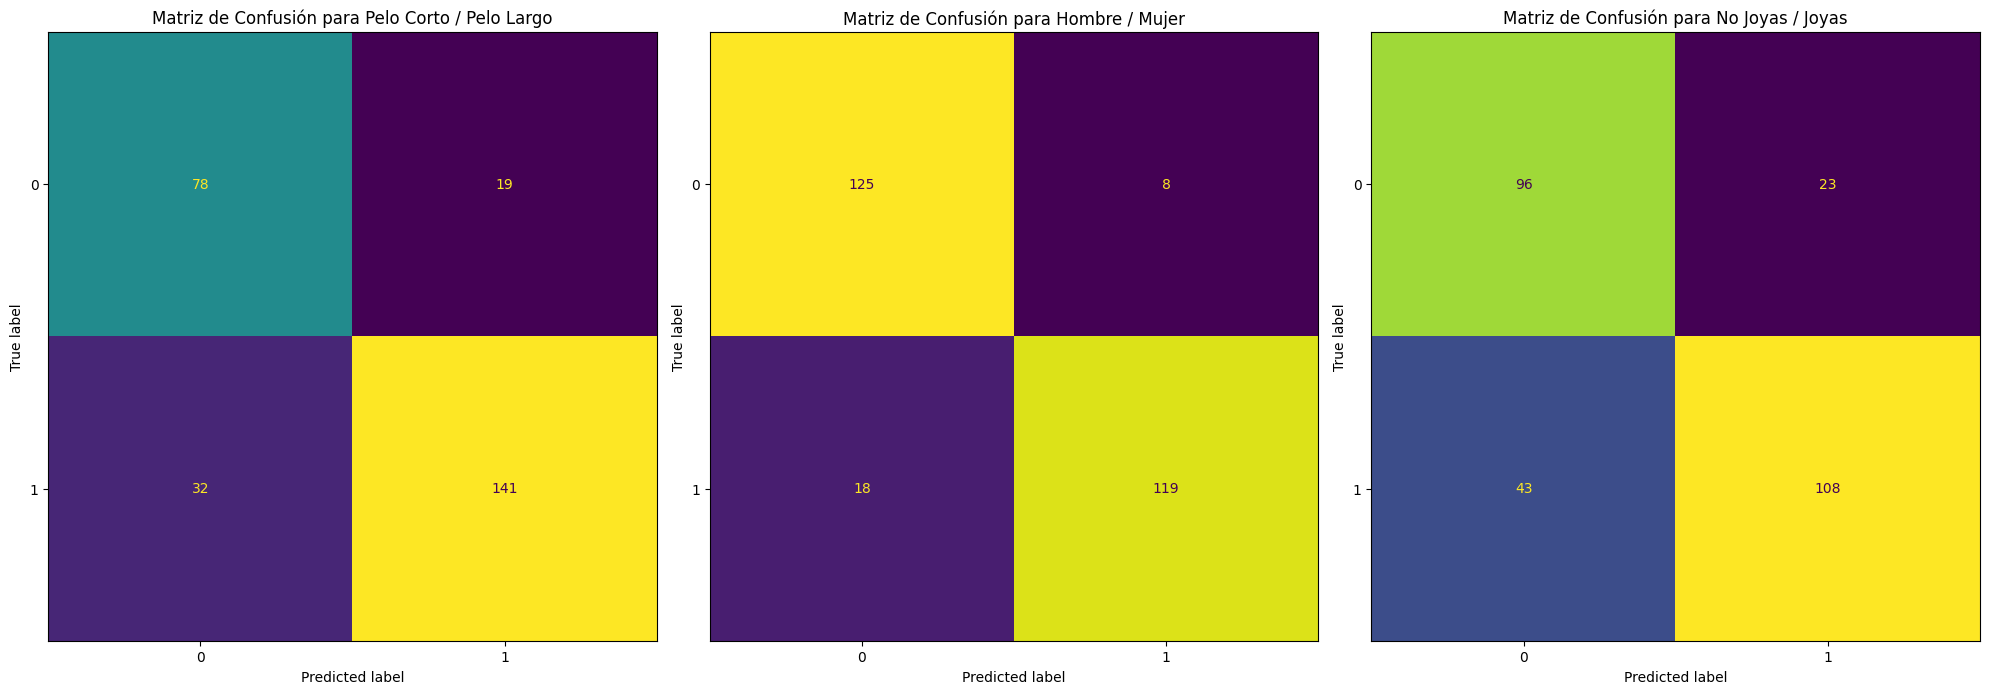

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

for i, label in enumerate(labels):
    cm = confusion_matrix(y_test[:, i], y_pred_binary[:, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(ax=axes[i], colorbar=False)
    axes[i].set_title(f'Matriz de Confusión para {label}')

plt.tight_layout()
plt.show()